In [18]:
import os
import pandas as pd
import pickle
# Correct import statement for accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# Reload the dataset with the correct delimiter
# dataset = pd.read_csv('/Users/samson/Documents/Final2/video/concatenated_file.csv')  # S1
dataset = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv')  # G2
# dataset = pd.read_csv('/Users/samson/Documents/Final2/wesad/wesad_all.csv')  # G1
# dataset = pd.read_csv('/Users/samson/Documents/Final2/combined/concatenated_swellwesad.csv') 

# # Display the first few rows of the dataframe to understand its structure
# data.head()

# Step 2: Checking for Missing Values
# Fill missing values with the median for simplicity (other strategies can be used based on context)
dataset.fillna(dataset.median(), inplace=True)

# data = data.rename(columns={'HRV_LF': 'LF'})

# video

# # Define a custom function to categorize 'Rating_Videorating'
# def categorize_rating(rating):
#     if rating <= 200:
#         return 0
#     elif rating <= 300:
#         return 0
#     elif rating <= 400:
#         return 1
#     else:
#         return 2


# # Apply the function to create a new 'stress' column
# dataset['stress'] = dataset['Rating_Videorating'].apply(categorize_rating)
# subCol = ['HR', 'LF']

# # Define features and target
# # X = data.drop(['Rating_Videorating', 'stress'], axis=1)
# X = dataset[subCol]
# y = dataset['stress']

#swell

label_mapping = {"no stress": 0, "time pressure": 1, "interruption": 2}
dataset['condition'] = dataset['condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['HR', 'LF']

y = dataset['condition'].copy()
X = dataset[subCol]

# combined

# dataset.fillna(0, inplace=True)

# # orignial trained features
# # subCol = ['HR_SQRT','pNN25','MEAN_RR','HR','MEAN_RR_SQRT','MEAN_RR_LOG','MEDIAN_RR','LF_PCT', 'HF']
# subCol = ['HR', 'LF']

# y = dataset['condition'].copy()
# X = dataset[subCol]

#wesad

# dataset['RMSSD'] = dataset['RMSSD'].fillna(0)
# dataset['SDSD'] = dataset['SDRR'].fillna(0)
# dataset['HR'] = dataset['HR'].fillna(0)
# dataset['pNN50'] = dataset['pNN50'].fillna(0)
# dataset['HF'] = dataset['HR'].fillna(0)
# dataset['HF_PCT'] = dataset['HF_PCT'].fillna(0)

# label_mapping = {"baseline": 0, "meditation": 0, "amusement": 1, "stress": 2}
# dataset['condition'] = dataset['condition'].replace(label_mapping)

# # orignial trained features
# # subCol = ['HR_SQRT','pNN25','MEAN_RR','HR','MEAN_RR_SQRT','MEAN_RR_LOG','MEDIAN_RR','LF_PCT', 'HF']
# subCol = ['HR', 'LF']

# dataset['condition'] = dataset['condition'].replace(label_mapping)
# y = dataset['condition'].copy()
# X = dataset[subCol]

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final2/swell/resultshrlf2'  # Update this to your directory  G1

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    # Calculate the average test score for the current classifier
    mean_test_score = result['cv_results']['mean_test_score'].mean()
    if mean_test_score > best_score:
        best_score = mean_test_score
        best_clf_name = clf_name

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# # Assuming it's a classifier, class probabilities for each sample
# class_probabilities = best_estimator.predict_proba(X)
# print (class_probabilities)

# Make predictions using the best model on your data
predictions = best_estimator.predict(X)
# predictions = predictions.astype(str)

# Calculate accuracy using 'y' as the true labels
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.5f}")

# Ensure y_test is of the same type as predictions
y = y.astype(predictions.dtype)

print(f"Best Classifier: {best_clf_name}")
print(f"Best Mean Accuracy: {best_score}")
print(predictions)

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# Print the hyperparameters of the best classifier
print(f"Hyperparameters of the Best Classifier ({best_clf_name}):")
print(best_estimator.get_params())

# Print each prediction value on a separate line for all 
# for i, pred in enumerate(predictions):
#     print(f"Sample {i}: Prediction - {pred}")
# Making the Confusion Matrix
# conf_matrix = confusion_matrix(y, predictions)

# # Plotting the confusion matrix using matplotlib and seaborn
# plt.figure(figsize=(10, 7))
# ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')  # Turn off automatic annotation

# # Manually add text annotations with better control.
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], 
#                 fontsize=12,  # you can change this size to fit your needs
#                 ha='center', va='center')

# plt.title('Confusion Matrix- infer Video from wesad')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

# Compare a few predicted labels with the true labels
comparison = pd.DataFrame({'True Labels': y, 'Predicted Labels': predictions})
print(comparison.head(20))

Accuracy: 0.90924
Best Classifier: CART
Best Mean Accuracy: 0.817812199675986
[1 0 0 ... 0 0 0]
Hyperparameters of the Best Classifier (CART):
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
    True Labels  Predicted Labels
0             0                 1
1             0                 0
2             0                 0
3             0                 0
4             0                 0
5             0                 0
6             0                 0
7             0                 1
8             0                 0
9             0                 0
10            0                 0
11            0                 0
12            0                 0
13            0                 0
14            0                 0
15            0                 0
1

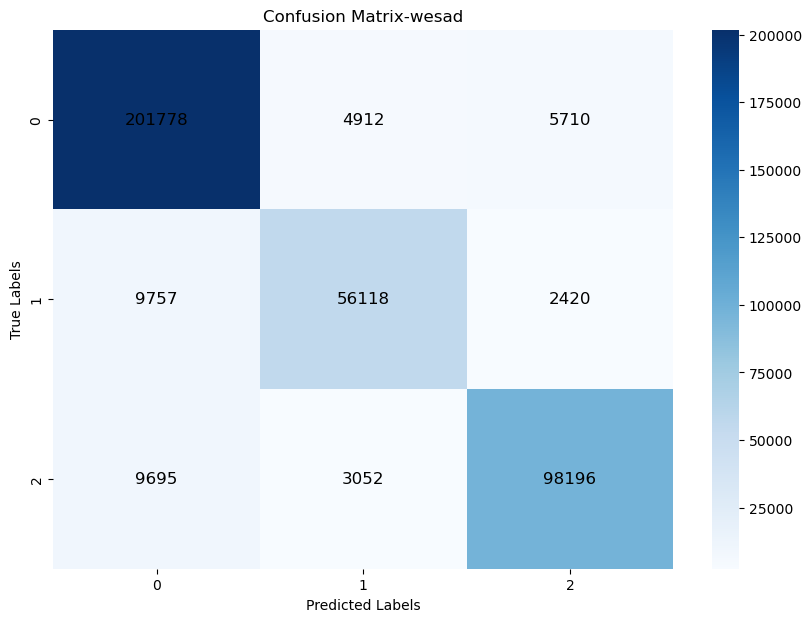

In [19]:
# Making the Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')  # Turn off automatic annotation

# Manually add text annotations with better control.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], 
                fontsize=12,  # you can change this size to fit your needs
                ha='center', va='center')

plt.title('Confusion Matrix-wesad')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

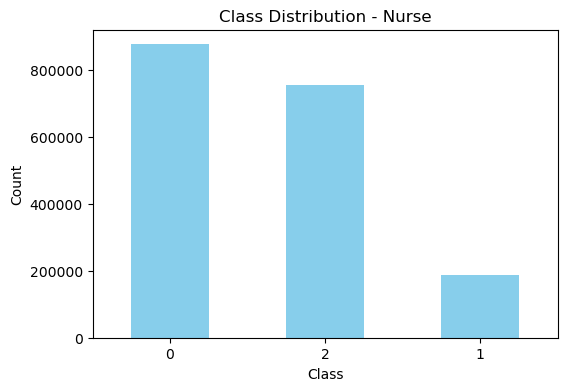

Class Counts:
0    875849
2    755530
1    186071
Name: stress, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
# For example:
# df = pd.read_csv('your_dataset.csv')

# Reading a sample CSV for demonstration purposes
#df = pd.read_csv('/Users/samson/Documents/Final2/nurse/combined_lagEDA.csv')  # Replace 'your_dataset.csv' with your CSV filename
#df = pd.read_csv('/Users/samson/Documents/Final2/dataverse/dataverse_all_events_OnTheFly.csv') 
#df = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv') 
data = pd.read_csv('/Users/samson/Documents/Final2/video/concatenated_file.csv') 
#df = pd.read_csv('/Users/samson/Documents/Final2/wesad/wesad_all.csv') 

# Assuming your dataset contains a column named 'label' that indicates the class
# Count the occurrences of each class in the 'label' column
#class_counts = df['Stress'].value_counts()
#class_counts = df['Comfort'].value_counts()
# Preprocessing
# Convert timestamp columns to numerical values
time_columns = ['Time_Biotrace', 'Time_Videorating', 'Time_Light', 'Time_Accel', 'Time_GPS']
for col in time_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').view('int64') // 10**9

# Define a custom function to categorize 'Rating_Videorating'
def categorize_rating(rating):
    if rating <= 200:
        return 0
    elif rating <= 300:
        return 1
    else:
        return 2

# Apply the function to create a new 'stress' column
data['stress'] = data['Rating_Videorating'].apply(categorize_rating)

# Define features and target
X = data.drop(['Rating_Videorating', 'stress'], axis=1)
y = data['stress']
class_counts = data['stress'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution - Nurse')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the class counts
print("Class Counts:")
print(class_counts)
